# Natural Language Processing

## Importing the libraries

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from wordcloud import WordCloud 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix , accuracy_score

## Importing the dataset

In [43]:
dataset = pd.read_csv("tripadvisor_hotel_reviews.csv"  )

In [44]:
dataset.shape[0]

20491

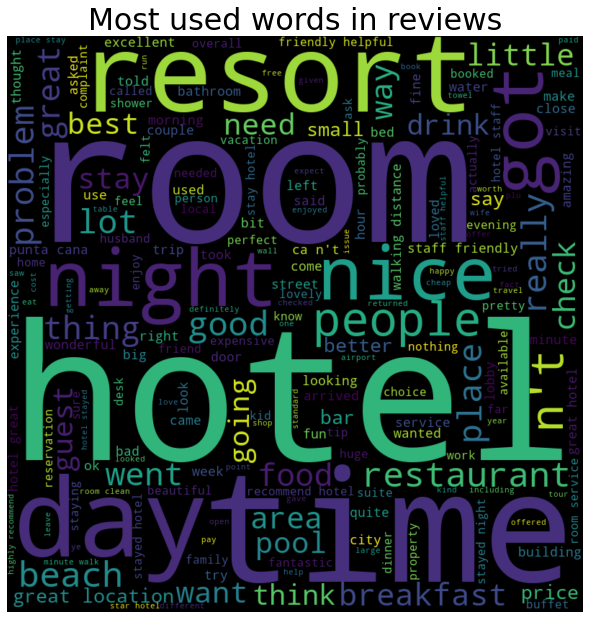

In [45]:
wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(dataset['Review'].values))
    # plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Most used words in reviews',fontsize=30)
plt.show()
# wordCloud_generator(dataset['Review'], title="Most used words in reviews")

## Cleaning the texts

In [46]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords   #To remove Non-essential words like the,is,are
from nltk.stem.porter import PorterStemmer  #To Stem the words, select keywords ignore different forms of the same word
corpus = []
for i in range(0, dataset.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])      #Replace Punctuation by Space
    review = review.lower()  #To transform to lower Case
    review = review.split() 
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)] #Iterate through the entire list and if that word is in stopwords then skip that iteration
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vatsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
corpus

['nice hotel expens park got good deal stay hotel anniversari arriv late even took advic previou review valet park check quick easi littl disappoint non exist view room room clean nice size bed comfort woke stiff neck high pillow not soundproof like heard music room night morn loud bang door open close hear peopl talk hallway mayb noisi neighbor aveda bath product nice not goldfish stay nice touch taken advantag stay longer locat great walk distanc shop overal nice experi pay park night',
 'ok noth special charg diamond member hilton decid chain shot th anniversari seattl start book suit paid extra websit descript not suit bedroom bathroom standard hotel room took print reserv desk show said thing like tv couch ect desk clerk told oh mix suit descript kimpton websit sorri free breakfast got kid embassi suit sit room bathroom bedroom unlik kimpton call suit day stay offer correct fals advertis send kimpton prefer guest websit email ask failur provid suit advertis websit reserv descript 

## Creating the Bag of Words model

In [48]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [49]:
len(X[0])

1500

In [50]:
print(len(X),len(y))

20491 20491


## Splitting the dataset into the Training set and Test set

In [51]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [52]:

X_train , X_test , y_train, y_test = train_test_split (X,y, test_size = .20, random_state = 0)

## Training the Naive Bayes model on the Training set

In [53]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [54]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 2]
 [4 2]
 [5 4]
 ...
 [5 5]
 [4 4]
 [5 5]]


In [55]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[ 202   50   13    3   17]
 [ 149   94   60   18   34]
 [  95   68   94   77  137]
 [  77   89  144  258  635]
 [  52   65   73  234 1361]]


0.49011954135154917

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.35      0.71      0.47       285
           2       0.26      0.26      0.26       355
           3       0.24      0.20      0.22       471
           4       0.44      0.21      0.29      1203
           5       0.62      0.76      0.69      1785

    accuracy                           0.49      4099
   macro avg       0.38      0.43      0.38      4099
weighted avg       0.47      0.49      0.46      4099



## Training the Artificial Neural Network model on the Training set

In [57]:
import tensorflow as tf

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units=1))
ann.compile(loss = 'mean_squared_error' , optimizer = 'adam')
ann.fit(X_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
513/513 [==============================] - 1s 2ms/step - loss: 4.5633
Epoch 2/50
513/513 [==============================] - 1s 2ms/step - loss: 1.3418
Epoch 3/50
513/513 [==============================] - 1s 2ms/step - loss: 0.7570
Epoch 4/50
513/513 [==============================] - 1s 2ms/step - loss: 0.5451
Epoch 5/50
513/513 [==============================] - 1s 2ms/step - loss: 0.4345
Epoch 6/50
513/513 [==============================] - 1s 2ms/step - loss: 0.3767
Epoch 7/50
513/513 [==============================] - 1s 2ms/step - loss: 0.3417
Epoch 8/50
513/513 [==============================] - 1s 2ms/step - loss: 0.3196
Epoch 9/50
513/513 [==============================] - 1s 2ms/step - loss: 0.3017
Epoch 10/50
513/513 [==============================] - 1s 2ms/step - loss: 0.2858
Epoch 11/50
513/513 [==============================] - 1s 2ms/step - loss: 0.2757
Epoch 12/50
513/513 [==============================] - 1s 2ms/step - loss: 0.2670
Epoch 13/50
513/513 [====

In [58]:
y_pred = ann.predict(X_test).round()
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))


[[4. 2.]
 [3. 2.]
 [5. 4.]
 ...
 [5. 5.]
 [4. 4.]
 [4. 5.]]


In [59]:
accs = accuracy_score(y_test,y_pred.round())
print(confusion_matrix(y_test,y_pred.round()),accs)

[[   0    0    0    0    0    0]
 [   7  164   70   27   14    3]
 [   0   87  136   71   49   12]
 [   0   30  103  101  196   41]
 [   0    8   68  105  525  497]
 [   0    2   17   34  368 1364]] 0.5586728470358624


In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.56      0.58      0.57       285
         2.0       0.35      0.38      0.36       355
         3.0       0.30      0.21      0.25       471
         4.0       0.46      0.44      0.45      1203
         5.0       0.71      0.76      0.74      1785

    accuracy                           0.56      4099
   macro avg       0.40      0.40      0.39      4099
weighted avg       0.55      0.56      0.55      4099



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
